# Load Data

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Understand and Clean Data

In [28]:
crime=pd.read_csv('Crime_Data_from_2020_to_Present.csv')
crime.head()

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,modus_operandi,...,status,status_description,crime_code_1,crime_code_2,crime_code_3,crime_code_4,location,cross_street,latitude,longitude
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [29]:
crime.columns

Index(['division_number', 'date_reported', 'date_occurred', 'area',
       'area_name', 'reporting_district', 'part', 'crime_code',
       'crime_description', 'modus_operandi', 'victim_age', 'victim_sex',
       'victim_descent', 'premise_code', 'premise_description', 'weapon_code',
       'weapon_description', 'status', 'status_description', 'crime_code_1',
       'crime_code_2', 'crime_code_3', 'crime_code_4', 'location',
       'cross_street', 'latitude', 'longitude'],
      dtype='object')

In [30]:
crime.shape

(852950, 27)

In [31]:
crime.dtypes

division_number          int64
date_reported           object
date_occurred           object
area                     int64
area_name               object
reporting_district       int64
part                     int64
crime_code               int64
crime_description       object
modus_operandi          object
victim_age               int64
victim_sex              object
victim_descent          object
premise_code           float64
premise_description     object
weapon_code            float64
weapon_description      object
status                  object
status_description      object
crime_code_1           float64
crime_code_2           float64
crime_code_3           float64
crime_code_4           float64
location                object
cross_street            object
latitude               float64
longitude              float64
dtype: object

In [32]:
#Check null
crime.isnull().sum()

division_number             0
date_reported               0
date_occurred               0
area                        0
area_name                   0
reporting_district          0
part                        0
crime_code                  0
crime_description           0
modus_operandi         118311
victim_age                  0
victim_sex             112606
victim_descent         112614
premise_code               10
premise_description       518
weapon_code            556202
weapon_description     556202
status                      0
status_description          0
crime_code_1               11
crime_code_2           790429
crime_code_3           850837
crime_code_4           852888
location                    0
cross_street           717289
latitude                    0
longitude                   0
dtype: int64

In [33]:
df=crime.drop(labels=['modus_operandi','weapon_code',
                     'weapon_description','crime_code_2','crime_code_3','crime_code_4','cross_street'],axis=1)
df

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,victim_sex,victim_descent,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852945,231606525,2023-03-22,2023-03-22 10:00:00,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,102.0,SIDEWALK,IC,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116
852946,231210064,2023-04-12,2023-04-12 16:30:00,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,222.0,LAUNDROMAT,IC,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915
852947,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,24,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485
852948,230906458,2023-03-05,2023-03-05 09:00:00,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,14500 HARTLAND ST,34.1951,-118.4487


In [34]:
df.sort_values(by='date_reported')
df

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,victim_sex,victim_descent,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852945,231606525,2023-03-22,2023-03-22 10:00:00,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,102.0,SIDEWALK,IC,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116
852946,231210064,2023-04-12,2023-04-12 16:30:00,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,222.0,LAUNDROMAT,IC,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915
852947,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,24,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485
852948,230906458,2023-03-05,2023-03-05 09:00:00,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,14500 HARTLAND ST,34.1951,-118.4487


In [35]:
#Update datetime
df['date_reported']=pd.to_datetime(df['date_reported'],format='%Y-%m-%d')
df['date_occurred']=pd.to_datetime(df['date_occurred'],format='%Y-%m-%d')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852950 entries, 0 to 852949
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   division_number      852950 non-null  int64         
 1   date_reported        852950 non-null  datetime64[ns]
 2   date_occurred        852950 non-null  datetime64[ns]
 3   area                 852950 non-null  int64         
 4   area_name            852950 non-null  object        
 5   reporting_district   852950 non-null  int64         
 6   part                 852950 non-null  int64         
 7   crime_code           852950 non-null  int64         
 8   crime_description    852950 non-null  object        
 9   victim_age           852950 non-null  int64         
 10  victim_sex           740344 non-null  object        
 11  victim_descent       740336 non-null  object        
 12  premise_code         852940 non-null  float64       
 13  premise_descri

In [37]:
df.describe()

,division_number,area,reporting_district,part,crime_code,victim_age,premise_code,crime_code_1,latitude,longitude
count,8.529500e+05,852950.000000,852950.000000,852950.000000,852950.000000,852950.000000,852940.000000,852939.000000,852950.000000,852950.000000
mean,2.166969e+08,10.707354,1117.165490,1.412575,500.746338,29.742191,305.974292,500.486350,33.983232,-118.040106
std,1.100081e+07,6.097178,609.716073,0.492298,207.705242,21.799470,216.950442,207.493864,1.756263,6.089068
min,8.170000e+02,1.000000,101.000000,1.000000,110.000000,-3.000000,101.000000,110.000000,0.000000,-118.667600
25%,2.102184e+08,6.000000,615.000000,1.000000,331.000000,5.000000,101.000000,331.000000,34.014100,-118.429700
50%,2.202184e+08,11.000000,1141.000000,1.000000,442.000000,31.000000,203.000000,442.000000,34.058500,-118.321500
75%,2.301094e+08,16.000000,1617.000000,2.000000,626.000000,45.000000,501.000000,626.000000,34.163200,-118.273900
max,2.399306e+08,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,956.000000,34.334300,0.000000


In [38]:
df.describe(include=['float','int64'])

,division_number,area,reporting_district,part,crime_code,victim_age,premise_code,crime_code_1,latitude,longitude
count,8.529500e+05,852950.000000,852950.000000,852950.000000,852950.000000,852950.000000,852940.000000,852939.000000,852950.000000,852950.000000
mean,2.166969e+08,10.707354,1117.165490,1.412575,500.746338,29.742191,305.974292,500.486350,33.983232,-118.040106
std,1.100081e+07,6.097178,609.716073,0.492298,207.705242,21.799470,216.950442,207.493864,1.756263,6.089068
min,8.170000e+02,1.000000,101.000000,1.000000,110.000000,-3.000000,101.000000,110.000000,0.000000,-118.667600
25%,2.102184e+08,6.000000,615.000000,1.000000,331.000000,5.000000,101.000000,331.000000,34.014100,-118.429700
50%,2.202184e+08,11.000000,1141.000000,1.000000,442.000000,31.000000,203.000000,442.000000,34.058500,-118.321500
75%,2.301094e+08,16.000000,1617.000000,2.000000,626.000000,45.000000,501.000000,626.000000,34.163200,-118.273900
max,2.399306e+08,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,956.000000,34.334300,0.000000


In [39]:
df['victim_age'].value_counts()

 0      211842
 30      19421
 35      19008
 31      18603
 29      18552
         ...  
 97         63
-1          60
-2          13
 120         1
-3           1
Name: victim_age, Length: 103, dtype: int64

In [40]:
df_age=df[df['victim_age']>0]

In [41]:
df_age

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,victim_sex,victim_descent,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468
5,200100501,2020-01-02,2020-01-01 00:30:00,1,Central,163,1,121,"RAPE, FORCIBLE",25,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,121.0,700 S BROADWAY,34.0452,-118.2534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852945,231606525,2023-03-22,2023-03-22 10:00:00,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,102.0,SIDEWALK,IC,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116
852946,231210064,2023-04-12,2023-04-12 16:30:00,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,222.0,LAUNDROMAT,IC,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915
852947,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,24,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485
852948,230906458,2023-03-05,2023-03-05 09:00:00,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,14500 HARTLAND ST,34.1951,-118.4487


In [42]:
df['year']=df['date_occurred'].dt.year
df['month']=df['date_occurred'].dt.month
df

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude,year,month
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,...,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020,1
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,...,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,2020,1
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,...,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2020,2
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,2020,1
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,...,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852945,231606525,2023-03-22,2023-03-22 10:00:00,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,...,102.0,SIDEWALK,IC,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116,2023,3
852946,231210064,2023-04-12,2023-04-12 16:30:00,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,...,222.0,LAUNDROMAT,IC,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915,2023,4
852947,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,24,...,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485,2023,7
852948,230906458,2023-03-05,2023-03-05 09:00:00,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,14500 HARTLAND ST,34.1951,-118.4487,2023,3


# Feature Understanding

In [43]:
print(df['month'])

0          1
1          1
2          2
3          1
4          1
          ..
852945     3
852946     4
852947     7
852948     3
852949    11
Name: month, Length: 852950, dtype: int64


<Axes: >

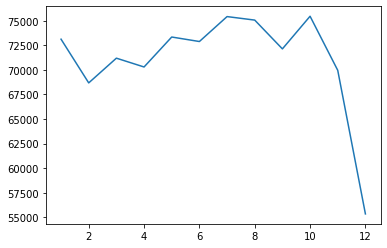

In [44]:
df['month'].value_counts().sort_index().plot()

<Axes: >

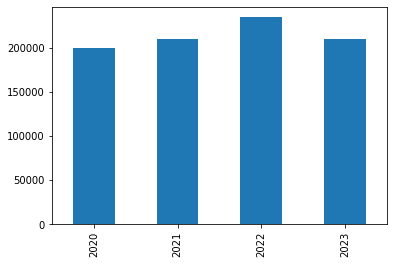

In [45]:
df['year'].value_counts().sort_index().plot(kind='bar')

In [46]:
df= df[~((df['month']==12) & (df['year']==2023))]

In [47]:
df.sort_values(by='date_occurred')

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude,year,month
168264,201810982,2020-05-11,2020-01-01 00:01:00,18,Southeast,1822,2,810,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...",17,...,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,810.0,400 W CENTURY BL,33.9456,-118.2808,2020,1
196441,220706832,2022-03-16,2020-01-01 00:01:00,7,Wilshire,782,2,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",0,...,203.0,OTHER BUSINESS,IC,Invest Cont,668.0,1800 S FAIRFAX AV,34.0431,-118.3692,2020,1
1559,210708670,2021-05-11,2020-01-01 00:01:00,7,Wilshire,775,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,13,...,710.0,OTHER PREMISE,AO,Adult Other,812.0,1700 S LONGWOOD AV,34.0437,-118.3440,2020,1
199361,221818077,2022-09-28,2020-01-01 00:01:00,18,Southeast,1801,1,820,ORAL COPULATION,6,...,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,812.0,500 W 92ND ST,33.9528,-118.2827,2020,1
129124,201704365,2020-01-02,2020-01-01 00:01:00,17,Devonshire,1761,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,...,122.0,"VEHICLE, PASSENGER/TRUCK",IC,Invest Cont,740.0,9500 OWENSMOUTH AV,34.2427,-118.6021,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672120,230717815,2023-12-01,2023-11-30 23:45:00,7,Wilshire,702,1,310,BURGLARY,30,...,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,310.0,700 N VISTA ST,34.0836,-118.3523,2023,11
766816,230917064,2023-12-04,2023-11-30 23:48:00,9,Van Nuys,984,1,310,BURGLARY,0,...,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,310.0,14600 SUTTON ST,34.1477,-118.4530,2023,11
770137,230221843,2023-12-01,2023-11-30 23:50:00,2,Rampart,216,1,510,VEHICLE - STOLEN,0,...,101.0,STREET,IC,Invest Cont,510.0,1000 CORONADO TR,34.0777,-118.2688,2023,11
726894,231116332,2023-12-01,2023-11-30 23:50:00,11,Northeast,1132,2,888,TRESPASSING,0,...,203.0,OTHER BUSINESS,IC,Invest Cont,888.0,3200 RIVERSIDE DR,34.1143,-118.2695,2023,11


<Axes: xlabel='year,month'>

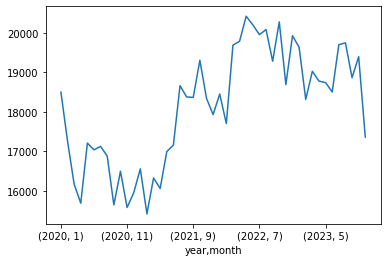

In [48]:
df.groupby(['year','month']).size().plot()

(array([9.54000e+03, 1.11203e+05, 2.11588e+05, 1.42224e+05, 9.39360e+04,
        5.35240e+04, 1.56730e+04, 2.90400e+03, 4.41000e+02, 1.00000e+00]),
 array([  2. ,  13.8,  25.6,  37.4,  49.2,  61. ,  72.8,  84.6,  96.4,
        108.2, 120. ]),
 <BarContainer object of 10 artists>)

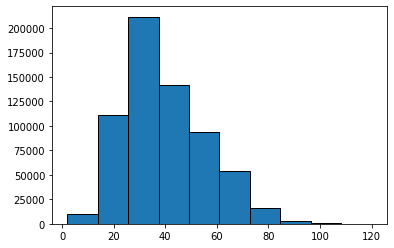

In [49]:
plt.hist(df_age['victim_age'],edgecolor='black',bins=10)

In [83]:
df['date_occurred_no_time']=df['date_occurred'].dt.date

In [84]:
df

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,status_description,crime_code_1,location,latitude,longitude,year,month,date_occurred_no_time,time_to_report,season
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,...,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020,1,2020-01-08,0,Winter
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,...,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,2020,1,2020-01-01,1,Winter
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,...,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2020,2,2020-02-13,61,Winter
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,...,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,2020,1,2020-01-01,0,Winter
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,...,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,2020,1,2020-01-01,0,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852945,231606525,2023-03-22,2023-03-22 10:00:00,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,...,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116,2023,3,2023-03-22,0,Spring
852946,231210064,2023-04-12,2023-04-12 16:30:00,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,...,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915,2023,4,2023-04-12,0,Spring
852947,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,24,...,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485,2023,7,2023-07-01,1,Summer
852948,230906458,2023-03-05,2023-03-05 09:00:00,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,...,Invest Cont,745.0,14500 HARTLAND ST,34.1951,-118.4487,2023,3,2023-03-05,0,Spring


### Daily crime count by date and description.

In [52]:
crime_count_per_day=df.groupby(['date_occurred_no_time','crime_description']).size()

In [53]:
crime_count_per_day

date_occurred_no_time  crime_description                                       
2020-01-01             ARSON                                                        4
                       ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              47
                       ATTEMPTED ROBBERY                                            5
                       BATTERY - SIMPLE ASSAULT                                    74
                       BATTERY POLICE (SIMPLE)                                      5
                                                                                   ..
2023-11-30             VEHICLE - ATTEMPT STOLEN                                     3
                       VEHICLE - STOLEN                                            51
                       VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)     2
                       VIOLATION OF COURT ORDER                                     2
                       VIOLATION OF RESTRAINING ORDER       

### Calculate the average occurrences for each crime description

In [54]:
top_20_crime=crime_count_per_day.groupby('crime_description').mean().reset_index(name='average_daily_count')\
        .sort_values(by='average_daily_count',ascending=False).head(20)
top_20_crime

,crime_description,average_daily_count
132,VEHICLE - STOLEN,63.830769
4,BATTERY - SIMPLE ASSAULT,47.432168
115,THEFT OF IDENTITY,37.331469
21,BURGLARY FROM VEHICLE,36.718182
20,BURGLARY,36.260839
129,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",36.185315
2,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",34.114685
117,THEFT PLAIN - PETTY ($950 & UNDER),30.306993
73,INTIMATE PARTNER - SIMPLE ASSAULT,29.833566
113,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),22.954545


### Analyze the top 20 crimes per day based on their average occurrences

<BarContainer object of 20 artists>

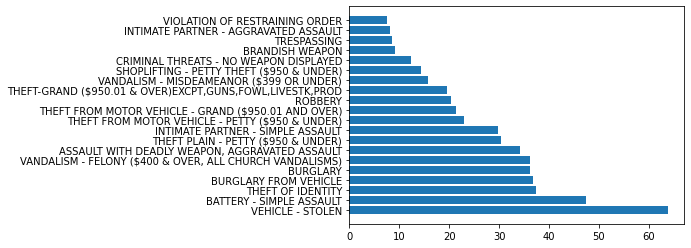

In [55]:
plt.barh(top_20_crime['crime_description'],top_20_crime['average_daily_count'])

In [56]:
top_20_crimes_sorted=top_20_crime.sort_values(by='average_daily_count',ascending=True)

### Analyze the daily average of the top 20 crimes

<BarContainer object of 20 artists>

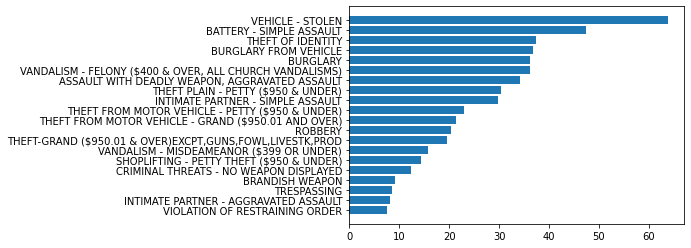

In [57]:
plt.barh(top_20_crimes_sorted['crime_description'],top_20_crimes_sorted['average_daily_count'])

Text(0.5, 1.0, 'Top 20 Crimes')

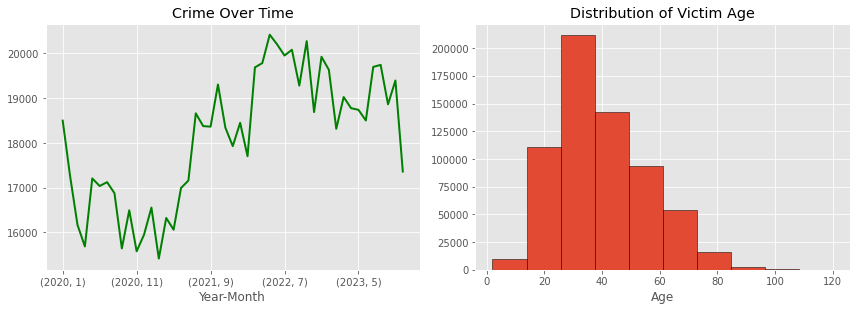

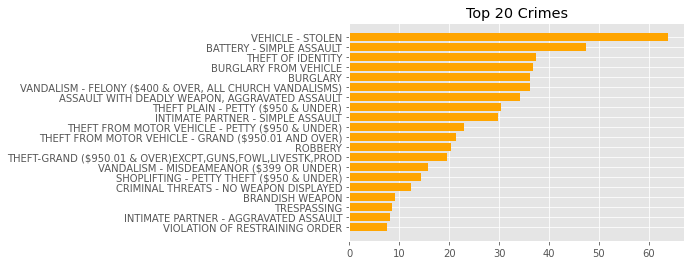

In [58]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8))

#Plot 1:Line plot
plt.subplot(2,2,1)
crime_date=df.groupby(['year','month']).size().plot(color='green',linewidth=2)
crime_date.set_xlabel('Year-Month',fontsize=12)
crime_date.set_title('Crime Over Time')

# Plot 2:Histogram
plt.subplot(2,2,2)
plt.hist(df_age['victim_age'],edgecolor='black',bins=10)
plt.tight_layout()
plt.xlabel('Age',fontsize=12)
plt.title('Distribution of Victim Age')
#Plot 3: Bar graph
#plt.subplot(2,2,3)
plt.figure()
plt.barh(top_20_crimes_sorted['crime_description'],top_20_crimes_sorted['average_daily_count'],color='orange')
plt.title('Top 20 Crimes')

### Measure the time difference between crime occurrence and reporting.

In [85]:
df['time_to_report']=(pd.to_datetime(df['date_reported'])-pd.to_datetime(df['date_occurred_no_time'])).dt.days

In [60]:
df

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,status,status_description,crime_code_1,location,latitude,longitude,year,month,date_occurred_no_time,time_to_report
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,...,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020,1,2020-01-08,0
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,...,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,2020,1,2020-01-01,1
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,...,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2020,2,2020-02-13,61
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,...,IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,2020,1,2020-01-01,0
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,...,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,2020,1,2020-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852945,231606525,2023-03-22,2023-03-22 10:00:00,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,...,IC,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116,2023,3,2023-03-22,0
852946,231210064,2023-04-12,2023-04-12 16:30:00,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,...,IC,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915,2023,4,2023-04-12,0
852947,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,24,...,IC,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485,2023,7,2023-07-01,1
852948,230906458,2023-03-05,2023-03-05 09:00:00,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,...,IC,Invest Cont,745.0,14500 HARTLAND ST,34.1951,-118.4487,2023,3,2023-03-05,0


In [61]:
df['time_to_report'].value_counts().head(10)

0    419620
1    185029
2     52808
3     30894
4     19932
5     14416
6     10837
7      9722
8      7053
9      5660
Name: time_to_report, dtype: int64

### Analyze the average time for promptly reported crimes

In [62]:
#peoples who reported quickly
df.groupby('crime_description')['time_to_report'].mean().sort_values().head(10)

crime_description
FAILURE TO DISPERSE                                         0.000000
DISRUPT SCHOOL                                              0.083333
PURSE SNATCHING - ATTEMPT                                   0.083333
PETTY THEFT - AUTO REPAIR                                   0.125000
LYNCHING                                                    0.157895
FIREARMS RESTRAINING ORDER (FIREARMS RO)                    0.250000
BOMB SCARE                                                  0.345960
BATTERY POLICE (SIMPLE)                                     0.371023
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)          0.400000
REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)    0.500000
Name: time_to_report, dtype: float64

### Analyze the average time for lately reported crimes

In [63]:
df.groupby('crime_description')['time_to_report'].mean().sort_values(ascending=False).head(10)

crime_description
CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)    128.181013
SEX OFFENDER REGISTRANT OUT OF COMPLIANCE                   123.779056
SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ    110.913921
LEWD/LASCIVIOUS ACTS WITH CHILD                              97.324675
DISHONEST EMPLOYEE ATTEMPTED THEFT                           87.000000
BIGAMY                                                       77.666667
SEXUAL PENETRATION W/FOREIGN OBJECT                          66.092946
ORAL COPULATION                                              62.078616
EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)                     61.322581
EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)                   59.657109
Name: time_to_report, dtype: float64

### #Identify the top 3 crimes with the highest average victim age

In [64]:
df_age.groupby('crime_description')['victim_age'].mean().reset_index().sort_values(by='victim_age',ascending=False).head(3)

,crime_description,victim_age
45,DISHONEST EMPLOYEE ATTEMPTED THEFT,60.000000
12,BLOCKING DOOR INDUCTION CENTER,54.666667
77,LYNCHING,53.000000


### Find the area with highest number of crimes occuring during night time

In [65]:
nighttime_crime=df[(df['date_occurred'].dt.hour>=20) | (df['date_occurred'].dt.hour<=3)]
nighttime_crime

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,status,status_description,crime_code_1,location,latitude,longitude,year,month,date_occurred_no_time,time_to_report
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,...,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020,1,2020-01-08,0
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,...,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,2020,1,2020-01-01,1
5,200100501,2020-01-02,2020-01-01 00:30:00,1,Central,163,1,121,"RAPE, FORCIBLE",25,...,IC,Invest Cont,121.0,700 S BROADWAY,34.0452,-118.2534,2020,1,2020-01-01,1
7,200100504,2020-01-04,2020-01-04 00:40:00,1,Central,155,2,946,OTHER MISCELLANEOUS CRIME,0,...,IC,Invest Cont,946.0,200 E 6TH ST,34.0448,-118.2474,2020,1,2020-01-04,0
8,200100507,2020-01-04,2020-01-04 02:00:00,1,Central,101,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",23,...,IC,Invest Cont,341.0,700 BERNARD ST,34.0677,-118.2398,2020,1,2020-01-04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852926,230406516,2023-03-19,2023-03-19 01:22:00,4,Hollenbeck,488,1,510,VEHICLE - STOLEN,0,...,IC,Invest Cont,510.0,3200 GARNET ST,34.0248,-118.2076,2023,3,2023-03-19,0
852927,230413421,2023-10-15,2023-10-15 22:45:00,4,Hollenbeck,409,2,624,BATTERY - SIMPLE ASSAULT,58,...,AO,Adult Other,624.0,5100 E HUNTINGTON DR,34.0932,-118.1615,2023,10,2023-10-15,0
852930,231514016,2023-08-27,2023-08-27 00:30:00,15,N Hollywood,1548,1,761,BRANDISH WEAPON,38,...,AO,Adult Other,761.0,11000 MCCORMICK ST,34.1660,-118.3705,2023,8,2023-08-27,0
852947,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,24,...,IC,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485,2023,7,2023-07-01,1


In [66]:
df['area_name'].value_counts()

Central        57548
77th Street    53540
Pacific        49794
Southwest      47779
Hollywood      44950
Southeast      43246
Olympic        42900
Newton         42669
N Hollywood    42372
Wilshire       40548
Rampart        39996
West LA        39129
Northeast      36664
Van Nuys       36029
West Valley    35777
Harbor         35050
Topanga        34690
Devonshire     34594
Mission        33942
Hollenbeck     31873
Foothill       28315
Name: area_name, dtype: int64

### Crime Density by Area Over Time

In [76]:
# Crimes by area and year
area_year_crimes = df.groupby(['area_name', 'year']).size().unstack(fill_value=0)

# Display changes for top 5 areas
top_areas = area_year_crimes.sum(axis=1).sort_values(ascending=False).head(5)
print(area_year_crimes.loc[top_areas.index])


year          2020   2021   2022   2023
area_name                              
Central      11589  13156  17673  15130
77th Street  13309  13074  14532  12625
Pacific      11562  12917  13013  12302
Southwest    11157  11392  13371  11859
Hollywood    10146  12084  12514  10206


In [67]:
hourly_crime=df['date_occurred'].dt.hour.value_counts().sort_index().reset_index()
hourly_crime

,index,date_occurred
0,0,35061
1,1,25740
2,2,21801
3,3,19040
4,4,16099
5,5,14829
6,6,19484
7,7,21985
8,8,31428
9,9,30812


<BarContainer object of 24 artists>

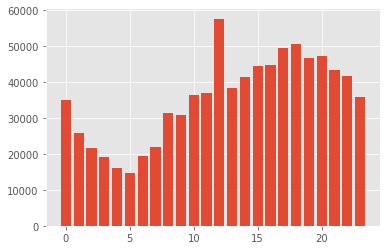

In [68]:
#crime sorted by the hour
plt.bar(hourly_crime['index'],hourly_crime['date_occurred'])

In [69]:
df[df['date_occurred'].dt.hour==12]['crime_description'].value_counts()

THEFT OF IDENTITY                               9098
VEHICLE - STOLEN                                4048
BATTERY - SIMPLE ASSAULT                        3958
THEFT PLAIN - PETTY ($950 & UNDER)              3785
BURGLARY                                        2945
                                                ... 
DRUGS, TO A MINOR                                  1
THEFT, COIN MACHINE - GRAND ($950.01 & OVER)       1
BIGAMY                                             1
GRAND THEFT / INSURANCE FRAUD                      1
INCITING A RIOT                                    1
Name: crime_description, Length: 124, dtype: int64

In [70]:
no_identity_theft=df[~(df['crime_description']=='THEFT OF IDENTITY')]

In [71]:
new_hourly_count=no_identity_theft['date_occurred'].dt.hour.value_counts().sort_index().reset_index()

<BarContainer object of 24 artists>

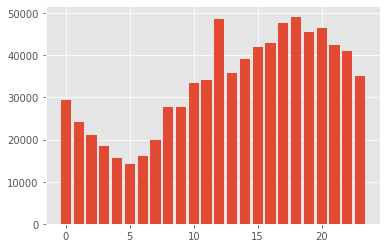

In [72]:
plt.bar(new_hourly_count['index'],new_hourly_count['date_occurred'])

In [86]:
# Map months to seasons
def map_to_season(month):
    if month in [12, 1, 2]: 
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['date_occurred'].dt.month.apply(map_to_season)


### Calculating percentage contribution of each season & Plotting seasonal variation

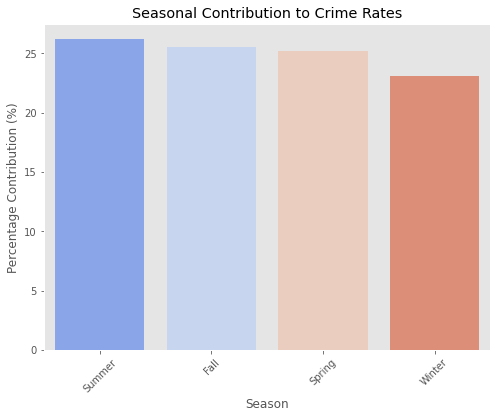

Seasonal Contribution to Crime Rates (%):
Summer    26.190515
Fall      25.507357
Spring    25.188346
Winter    23.113782
Name: season, dtype: float64


In [74]:
import seaborn as sns

seasonal_contribution = (seasonal_crime_counts / seasonal_crime_counts.sum()) * 100

# Plot seasonal variation
plt.figure(figsize=(8, 6))
sns.barplot(x=seasonal_contribution.index, y=seasonal_contribution.values, palette='coolwarm')
plt.title('Seasonal Contribution to Crime Rates')
plt.xlabel('Season')
plt.ylabel('Percentage Contribution (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Display contribution percentages
print("Seasonal Contribution to Crime Rates (%):")
print(seasonal_contribution)
